## Author: Hrithik Sharma

# Linear Regression using Python (Supervised Learning)
We will use Linear Regression algorithm to predict the outcome with the help of Python's Sckit-Learn Library. We will perform Exploratory Data Analysis using numpy, pandas, matplotlib and seaborn.

## Simple Linear Regression
Simple Linear Regression is a basic Machine Learning Algorithm. We will analyse a very simple dataframe containing only two variables 'Hours' and 'Scores'. After training our model and estimating the regression coefficients using principle of Least Squares, we will apply our model on the test data and finally will find number of performance metrics in order to estimate the efficiency of our fitted model. 

### Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Getting the Data

In [5]:
url = 'http://bit.ly/w-data'

In [6]:
marks = pd.read_csv(url)

In [7]:
#Checking the head of the 'marks' dataframe
marks.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#Checking for the number of columns and rows, and datatypes of the variables in the dataframe
marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#Descriptive Statistics
marks.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#Checking for the null values if any
marks.isnull().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:>

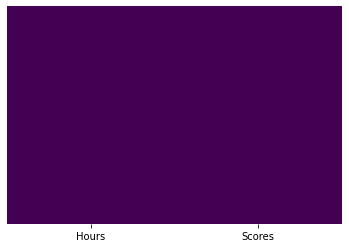

In [15]:
#Graphically checking for the null values using heatmap
sns.heatmap(marks.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

Since there are no marks in our heatmap, it is clear that we have no missing values in our dataset

### Exploratory Data Analysis

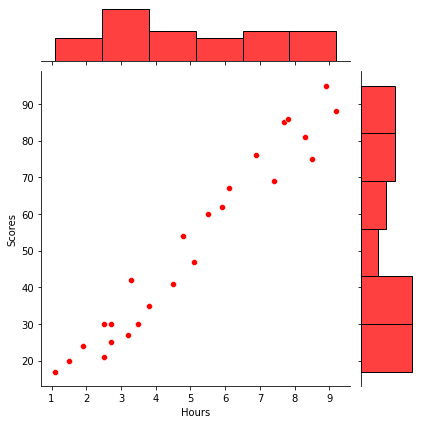

In [16]:
#Plotting jointplot using seaborn to look for the possible relationship between response variable and the regressor
sns.jointplot(x = 'Hours', y = 'Scores', data = marks, color='red')

<AxesSubplot:>

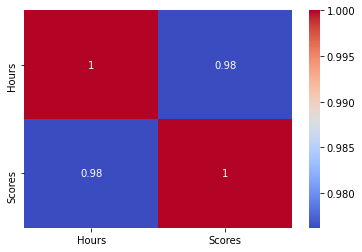

In [17]:
#Let us check the correlation coefficient
sns.heatmap(marks.corr(), annot = True, cmap='coolwarm')

Since there is only one regressor i.e. 'Hours' therefore there is no question of ' MULTICOLLINEARITY'

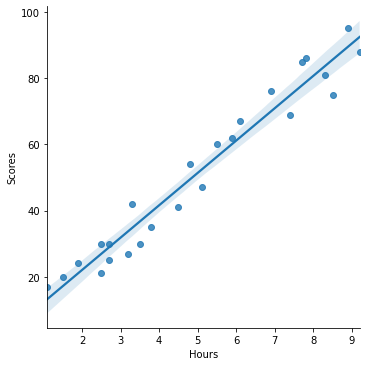

In [10]:
#Linear Model Plot
sns.lmplot(x='Hours', y='Scores', data=marks)

### Forming X and y DataFrames

In [18]:
# 'X' refers to the matrix of Regressor variables and 'y' refers to the vector of the Response Variable
X = marks['Hours']
y = marks['Scores']

### Splitting the dataset into training and testing datasets

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

# As our regressor is only a single variable, we have to convert that to matrix of required number of rows and 1 column.
X_train = np.array(X_train).reshape((-1,1)) 
X_test = np.array(X_test).reshape((-1,1))

In [26]:
#Checking the shape of our training and testing datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 1)
(8, 1)
(17,)
(8,)


### Creating and Training the Model

In [27]:
from sklearn.linear_model import LinearRegression

#Fitting our trainig set
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Model Evaluation

In [29]:
#Intercept of our model
intercept = lm.intercept_
intercept

2.2539360229005183

In [28]:
#Coefficint of our model
coefficient = lm.coef_
coefficient[0]

10.033920197353872

In [30]:
#Putting intercept and coeffcient in a nice looking dataframe 

model = pd.DataFrame(np.array([intercept, coefficient[0]]), ['Intercept', 'Coefficient'], columns = ['Model Parameters'])
model

,Model Parameters
Intercept,2.253936
Coefficient,10.033920


### Predictions from our Model

In [31]:
predictions = lm.predict(X_test)
predictions

array([27.33873652, 40.38283277, 34.36248065, 53.42692903, 94.56600184,
       80.51851356, 63.46084923, 87.5422577 ])

Text(0, 0.5, 'Predictions')

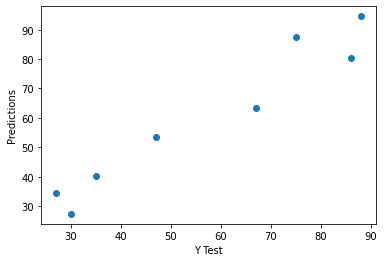

In [32]:
#Scatterplot between Predicted Values and Real Test Values

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predictions')

From the above scatterplot of 'ACTUAL Y values' vs 'PREDICTED Y values', it looks our model is pretty good in predicting.

### Evaluating the Model

In [33]:
from sklearn import metrics

# Finding 'ROOT MEAN SQUARE ERROR' and 'COEFFICIENT OF DETERMINATION'
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R squared:', metrics.r2_score(y_test, predictions))

RMSE: 6.842529140021158
R squared: 0.9156178896102483


### Comparing Training Set performance with the Test Set performance

In [35]:
predictions_train = lm.predict(X_train) #Predicted values using our training dataset

print('Model Performance for Training Set')
print('----------------------------------')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions_train)))
print('R squared:', metrics.r2_score(y_train, predictions_train))
print('')
print('')
print('Model Performance for Testing Set')
print('----------------------------------')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R squared:', metrics.r2_score(y_test, predictions))

Model Performance for Training Set
----------------------------------
RMSE: 4.765077128781104
R squared: 0.963463940377195


Model Performance for Testing Set
----------------------------------
RMSE: 6.842529140021158
R squared: 0.9156178896102483


Seeing the comparison above, looks our model is nice to predict Scores on this hypothetical data.

### Predicting SCORE for a single value of HOUR

In [38]:
hour = 9.25
test_value = np.array([hour]).reshape(-1,1)
y_predict = lm.predict(test_value)

print('Predicted value of SCORE for the study of {} is: {}'.format(hour, y_predict[0]))

Predicted value of SCORE for the study of 9.25 is: 95.06769784842383
